In [127]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
import seaborn as sb

## Question 1

Import the data set and print 10 random rows from the data set

In [129]:
colnames = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris_df = pd.read_csv("iris.data", names=colnames)
print(iris_df.head(10))

   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [130]:
print("The below functions helps us to identify if there is a null value in the data frame.")
print(iris_df.info())

The below functions helps us to identify if there is a null value in the data frame.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [131]:
from sklearn.preprocessing import LabelEncoder
iris_df['class_encoded'] = LabelEncoder().fit_transform(iris_df['class'])
print(iris_df)

     sepal length  sepal width  petal length  petal width           class  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
5             5.4          3.9           1.7          0.4     Iris-setosa   
6             4.6          3.4           1.4          0.3     Iris-setosa   
7             5.0          3.4           1.5          0.2     Iris-setosa   
8             4.4          2.9           1.4          0.2     Iris-setosa   
9             4.9          3.1           1.5          0.1     Iris-setosa   
10            5.4          3.7           1.5          0.2     Iris-setosa   
11            4.8          3.4           1.6          0.2     Iris-setosa   

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [132]:
print(iris_df.corr())
print("From the correlation table it is observed that none of the independent variable has the correlation with the target variable in the range of -0.1 and 0.1. Hence we cannot drop the independent variables from the feature set.")


               sepal length  sepal width  petal length  petal width  \
sepal length       1.000000    -0.109369      0.871754     0.817954   
sepal width       -0.109369     1.000000     -0.420516    -0.356544   
petal length       0.871754    -0.420516      1.000000     0.962757   
petal width        0.817954    -0.356544      0.962757     1.000000   
class_encoded      0.782561    -0.419446      0.949043     0.956464   

               class_encoded  
sepal length        0.782561  
sepal width        -0.419446  
petal length        0.949043  
petal width         0.956464  
class_encoded       1.000000  
From the correlation table it is observed that none of the independent variable has the correlation with the target variable in the range of -0.1 and 0.1. Hence we cannot drop the independent variables from the feature set.


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [133]:
print(iris_df.var())
print("Since the variances are greater than decimal 1. Hence we do not drop any independent variables.")

sepal length     0.685694
sepal width      0.188004
petal length     3.113179
petal width      0.582414
class_encoded    0.671141
dtype: float64
Since the variances are greater than decimal 1. Hence we do not drop any independent variables.


## Question 6

*Plot the scatter matrix for all the variables.*

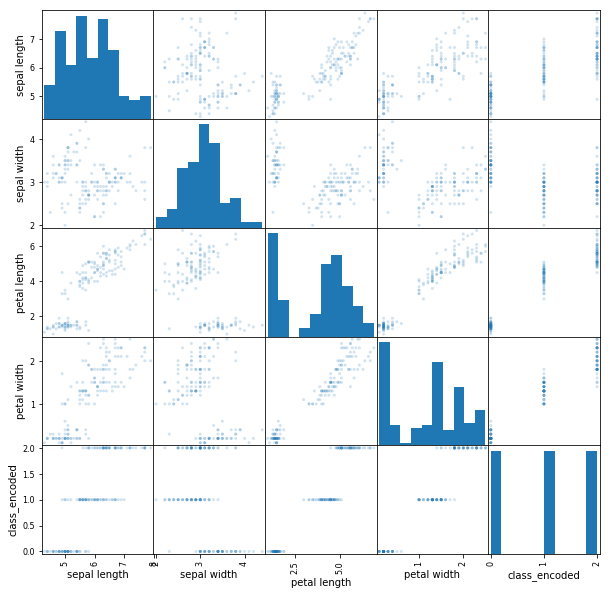

In [134]:
pd.scatter_matrix(iris_df, alpha=0.2, figsize=(10, 10))
plt.show()

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [135]:
X = iris_df.drop(labels= ["class_encoded","class"] , axis = 1)
y = iris_df[["class_encoded"]]
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [136]:
neighbors = [3, 5, 9]
print(neighbors)
for x in neighbors:
    NNH = KNeighborsClassifier(n_neighbors= x)
    NNH.fit(X_train,y_train)
    ypred = NNH.predict(X_test)
    accuracy=metrics.accuracy_score(y_test,ypred)
    print("The accuracy when k={} is {}".format(x,accuracy))

[3, 5, 9]
The accuracy when k=3 is 0.9
The accuracy when k=5 is 0.9
The accuracy when k=9 is 0.9


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [137]:
neighbors = np.arange(19)
mse = []
for x in neighbors:
    NNH = KNeighborsClassifier(n_neighbors= x+1)
    NNH.fit(X_train,y_train)
    ypred = NNH.predict(X_test)
    accuracy=metrics.accuracy_score(y_test,ypred)
    print("The accuracy when k={} is {}.".format(x+1,accuracy))
    print("And the MSE value is (1 - Test Accuracy Score) {}".format(1-accuracy))
    mse.append(1-accuracy)
    
print(mse)
print("The minimum value is {}".format(min(mse)))
print("The model with the lowest MSE is value is when k(number of neighbors) is 2, 10 and 13")

The accuracy when k=1 is 0.9.
And the MSE value is (1 - Test Accuracy Score) 0.09999999999999998
The accuracy when k=2 is 0.9333333333333333.
And the MSE value is (1 - Test Accuracy Score) 0.06666666666666665
The accuracy when k=3 is 0.9.
And the MSE value is (1 - Test Accuracy Score) 0.09999999999999998
The accuracy when k=4 is 0.9333333333333333.
And the MSE value is (1 - Test Accuracy Score) 0.06666666666666665
The accuracy when k=5 is 0.9.
And the MSE value is (1 - Test Accuracy Score) 0.09999999999999998
The accuracy when k=6 is 0.8666666666666667.
And the MSE value is (1 - Test Accuracy Score) 0.1333333333333333
The accuracy when k=7 is 0.8666666666666667.
And the MSE value is (1 - Test Accuracy Score) 0.1333333333333333
The accuracy when k=8 is 0.9.
And the MSE value is (1 - Test Accuracy Score) 0.09999999999999998
The accuracy when k=9 is 0.9.
And the MSE value is (1 - Test Accuracy Score) 0.09999999999999998
The accuracy when k=10 is 0.9.
And the MSE value is (1 - Test Accurac

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

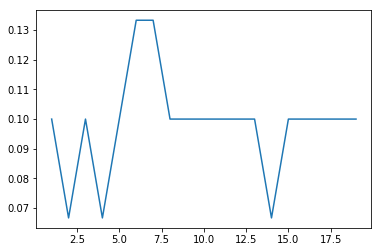

In [138]:
plt.plot(neighbors+1, mse)

# Naive Bayes with Iris Data

In [139]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [140]:
#Check the dataset
print(y)
print(X)

     class_encoded
0                0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               0
20               0
21               0
22               0
23               0
24               0
25               0
26               0
27               0
28               0
29               0
..             ...
120              2
121              2
122              2
123              2
124              2
125              2
126              2
127              2
128              2
129              2
130              2
131              2
132              2
133              2
134              2
135              2
136              2
137              2
138              2
139              2
140         

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

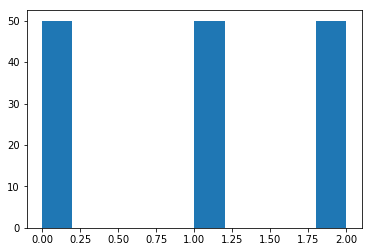

In [141]:
plt.hist(iris_df["class_encoded"])
plt.show()

In [142]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [143]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [144]:
print(iris_df.corr())

               sepal length  sepal width  petal length  petal width  \
sepal length       1.000000    -0.109369      0.871754     0.817954   
sepal width       -0.109369     1.000000     -0.420516    -0.356544   
petal length       0.871754    -0.420516      1.000000     0.962757   
petal width        0.817954    -0.356544      0.962757     1.000000   
class_encoded      0.782561    -0.419446      0.949043     0.956464   

               class_encoded  
sepal length        0.782561  
sepal width        -0.419446  
petal length        0.949043  
petal width         0.956464  
class_encoded       1.000000  


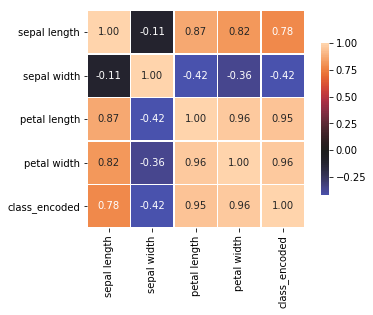

In [145]:
sb.heatmap(iris_df.corr(), vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Split data in Training and test set in 80:20.

In [146]:
X = iris_df.drop(labels= ["class_encoded","class"] , axis = 1)
y = iris_df[["class_encoded"]]
test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Question 13 
Do Feature Scaling 

In [147]:
# Use StandardScaler or similar methods

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(sc.fit(X,y))

StandardScaler(copy=True, with_mean=True, with_std=True)


### Question 14 
Train and Fit NaiveBayes Model

In [149]:
#Fit the model
multinb = MultinomialNB()
multinb.fit(X_train,y_train)
ypred = multinb.predict(X_test)

In [150]:
#Predict
print("The predicted values are {}.".format(ypred))

The predicted values are [2 2 0 2 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 2 1 2 1 1 2 2].


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [151]:
# show Confusion Matrix
cm=metrics.confusion_matrix(y_test,ypred)
print(cm)

[[ 7  0  0]
 [ 0  8  4]
 [ 0  1 10]]


In [152]:
# show accuracy
accuracy=metrics.accuracy_score(y_test,ypred)
print("The accuracy using Naive Bayes is {}.".format(accuracy))

The accuracy using Naive Bayes is 0.8333333333333334.


In [153]:
#Show precision and Recall metrics

In [154]:
precision = metrics.precision_score(y_test, ypred, average='micro')
recall = metrics.recall_score(y_test, ypred, average='micro')
print("The precision is {} and recall is {}".format(precision, recall))

The precision is 0.8333333333333334 and recall is 0.8333333333333334


# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779